In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
cifar10 = keras.datasets.cifar10

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

In [4]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
X_train.shape, y_train.shape

((45000, 32, 32, 3), (45000, 1))

In [6]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [7]:
X_valid.shape, y_valid.shape

((5000, 32, 32, 3), (5000, 1))

In [8]:
model = keras.models.Sequential()

In [9]:
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))

In [10]:
from functools import partial

In [11]:
BoringLayer = partial(keras.layers.Dense,
                      activation='elu',
                      kernel_initializer='he_normal')

In [12]:
for i in range(20):
    model.add(BoringLayer(100))

In [13]:
model.add(BoringLayer(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [15]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9,
                                   beta_2=0.999, epsilon=1e-07,
                                   name='Nadam')

In [16]:
# seems like I need a build model function -> then I need a scikit learn wrapper
# -> call this wrapper on Grid search (param grid will have different learning rates)
# -> specify different callbacks before grid search 

In [17]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint('cifar_model.h5', save_best_only=True)

In [18]:
import os
root_logdir = os.path.join(os.curdir, 'my_logs')

In [19]:
def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_$m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

In [20]:
# # ok let's do this from scratch
# def build_model(learning_rate='1e-5'):
#     model = keras.models.Sequential()
#     model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
#     for i in range(20):
#         model.add(BoringLayer(100))
#     model.add(BoringLayer(10, activation='softmax'))
#     optimizer = keras.optimizers.Nadam(learning_rate=learning_rate, beta_1=0.9,
#                                    beta_2=0.999, epsilon=1e-07,
#                                    name='Nadam')
#     model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
#                   optimizer=optimizer, 
#                   metrics=['accuracy']
#                  )
#     return model

In [22]:
# keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [23]:
tensorboard_cb = keras.callbacks.TensorBoard(get_run_logdir())

In [24]:
# from scipy.stats import reciprocal
# params = {'learning_rate': reciprocal(5e-5, 1e-2)}

In [25]:
# from sklearn.model_selection import RandomizedSearchCV

In [26]:
# rnd_search_cv = RandomizedSearchCV(keras_reg, params, n_iter=10, cv=3)

In [27]:
# rnd_search_cv.fit(X_train, y_train, epochs=50,
#                  validation_data=(X_valid, y_valid),
#                   callbacks=[early_stopping_cb, checkpoint_cb, tensorboard_cb])

In [30]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=optimizer, 
                  metrics=['accuracy'])

In [31]:
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb, checkpoint_cb, tensorboard_cb])

Epoch 1/50
1407/1407 [==============================] - 22s 14ms/step - loss: 10.7351 - accuracy: 0.1835 - val_loss: 2.1613 - val_accuracy: 0.1872
Epoch 2/50
1407/1407 [==============================] - 17s 12ms/step - loss: 1.9563 - accuracy: 0.2817 - val_loss: 2.0392 - val_accuracy: 0.2488
Epoch 3/50
1407/1407 [==============================] - 19s 14ms/step - loss: 1.8811 - accuracy: 0.3102 - val_loss: 1.8567 - val_accuracy: 0.3226
Epoch 4/50
1407/1407 [==============================] - 17s 12ms/step - loss: 1.8392 - accuracy: 0.3266 - val_loss: 1.8088 - val_accuracy: 0.3388
Epoch 5/50
1407/1407 [==============================] - 19s 13ms/step - loss: 1.8142 - accuracy: 0.3402 - val_loss: 1.8117 - val_accuracy: 0.3416
Epoch 6/50
1407/1407 [==============================] - 19s 14ms/step - loss: 1.8135 - accuracy: 0.3419 - val_loss: 2.0207 - val_accuracy: 0.2772
Epoch 7/50
1407/1407 [==============================] - 18s 13ms/step - loss: 1.7703 - accuracy: 0.3635 - val_loss: 1.9970 

In [32]:
model = keras.models.load_model('cifar_model.h5')

In [33]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.8051 - accuracy: 0.3348


[1.8050748109817505, 0.33480000495910645]

In [38]:
history.history

{'loss': [3.5667781829833984,
  1.9336211681365967,
  1.8725244998931885,
  1.8290033340454102,
  1.8087682723999023,
  1.790785789489746,
  1.7597980499267578,
  1.7426953315734863,
  2.2148938179016113,
  1.9786818027496338,
  1.909177303314209,
  1.873127818107605,
  1.8494229316711426,
  1.8362362384796143],
 'accuracy': [0.22157777845859528,
  0.29019999504089355,
  0.3168666660785675,
  0.3303777873516083,
  0.3411555588245392,
  0.3509555459022522,
  0.36711111664772034,
  0.37095555663108826,
  0.20288889110088348,
  0.243066668510437,
  0.26919999718666077,
  0.2927555441856384,
  0.3027999997138977,
  0.30837777256965637],
 'val_loss': [2.161280632019043,
  2.039180040359497,
  1.8567308187484741,
  1.8087873458862305,
  1.8117440938949585,
  2.020731210708618,
  1.9970035552978516,
  1.8536070585250854,
  2.097980499267578,
  1.9046504497528076,
  1.9088480472564697,
  1.9265791177749634,
  1.9235188961029053,
  1.8222101926803589],
 'val_accuracy': [0.18719999492168427,
  0

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

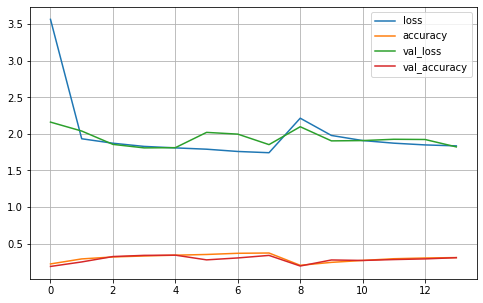

In [41]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1)
plt.show()

In [42]:
# new model with batch normalization (with activation)
bn_model = keras.models.Sequential()
bn_model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
bn_model.add(keras.layers.BatchNormalization())

In [43]:
# setting bias to be False since batch normalization already includes an offset parameter per input
for i in range(20):
    bn_model.add(keras.layers.Dense(100, kernel_initializer='he_normal', use_bias=False))
    bn_model.add(keras.layers.BatchNormalization())
    bn_model.add(keras.layers.Activation('elu'))

In [44]:
bn_model.add(keras.layers.Dense(10, activation='softmax'))

In [45]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('cifar_model_bn.h5', save_best_only=True)

In [46]:
bn_model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=optimizer, 
                  metrics=['accuracy'])

In [56]:
bn_history = bn_model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb, checkpoint_cb, tensorboard_cb])

Epoch 1/50
1407/1407 [==============================] - 22s 14ms/step - loss: 1.7463 - accuracy: 0.3616 - val_loss: 1.7564 - val_accuracy: 0.3692
Epoch 2/50
1407/1407 [==============================] - 18s 12ms/step - loss: 1.6931 - accuracy: 0.3833 - val_loss: 1.7257 - val_accuracy: 0.3706
Epoch 3/50
1407/1407 [==============================] - 18s 13ms/step - loss: 1.6728 - accuracy: 0.3934 - val_loss: 1.6989 - val_accuracy: 0.3870
Epoch 4/50
1407/1407 [==============================] - 18s 13ms/step - loss: 1.6643 - accuracy: 0.3947 - val_loss: 1.6793 - val_accuracy: 0.3894
Epoch 5/50
1407/1407 [==============================] - 19s 14ms/step - loss: 1.6542 - accuracy: 0.4029 - val_loss: 1.6808 - val_accuracy: 0.3928
Epoch 6/50
1407/1407 [==============================] - 20s 14ms/step - loss: 3.3563 - accuracy: 0.3183 - val_loss: 1.8400 - val_accuracy: 0.3060
Epoch 7/50
1407/1407 [==============================] - 19s 13ms/step - loss: 1.7648 - accuracy: 0.3477 - val_loss: 1.7681 -

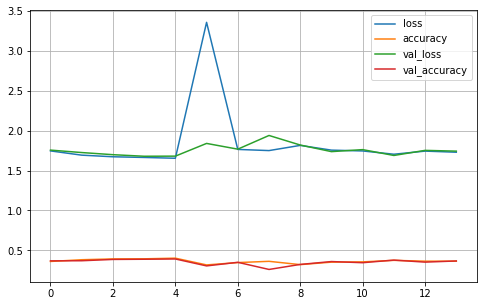

In [57]:
pd.DataFrame(bn_history.history).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1)
plt.show()

In [58]:
bn_model = keras.models.load_model("cifar_model_bn.h5")

In [59]:
bn_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.6698 - accuracy: 0.3854


[1.6698400974273682, 0.3853999972343445]

In [60]:
# replacing batch normalization with SELU
selu_model = keras.models.Sequential()
selu_model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))

In [61]:
for i in range(20):
    selu_model.add(keras.layers.Dense(100, activation='selu', 
                                      kernel_initializer='lecun_normal'))

In [62]:
selu_model.add(keras.layers.Dense(10, activation='softmax'))

In [66]:
selu_model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=optimizer, 
                  metrics=['accuracy'])

In [67]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('cifar_model_selu.h5', save_best_only=True)

In [68]:
selu_history = selu_model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/50
1407/1407 [==============================] - 20s 12ms/step - loss: 2.8203 - accuracy: 0.1753 - val_loss: 1.9528 - val_accuracy: 0.2638
Epoch 2/50
1407/1407 [==============================] - 16s 12ms/step - loss: 1.9804 - accuracy: 0.2448 - val_loss: 1.9487 - val_accuracy: 0.2664
Epoch 3/50
1407/1407 [==============================] - 19s 14ms/step - loss: 1.9642 - accuracy: 0.2517 - val_loss: 1.9641 - val_accuracy: 0.2606
Epoch 4/50
1407/1407 [==============================] - 23s 16ms/step - loss: 1.9639 - accuracy: 0.2526 - val_loss: 2.0171 - val_accuracy: 0.2392
Epoch 5/50
1407/1407 [==============================] - 15s 11ms/step - loss: 1.9556 - accuracy: 0.2556 - val_loss: 1.9690 - val_accuracy: 0.2504
Epoch 6/50
1407/1407 [==============================] - 19s 13ms/step - loss: 1.9812 - accuracy: 0.2380 - val_loss: 1.9670 - val_accuracy: 0.2538
Epoch 7/50
1407/1407 [==============================] - 17s 12ms/step - loss: 1.9387 - accuracy: 0.2605 - val_loss: 1.9533 -

KeyboardInterrupt: 

In [69]:
# you're an idiot Kalyani. you forgot scaling and standardizing your training, validation and test sets. also,
# why the heck are you using the evaluate method on the test set again and again. you'r an idiot.
# this is not allowed -> multiple testing error